In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [3]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
treino['familia'] = treino['SibSp'] + treino['Parch']

In [5]:
def transf_sex(valor):
    if valor == 'female':
        return 1
    else:
        return 0

treino['Sexo_bin'] = treino['Sex'].map(transf_sex)

In [7]:
treino.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familia,Sexo_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,1


In [8]:
treino['Embarked_S'] = (treino['Embarked'] == 'S').astype(int)
treino['Embarked_C'] = (treino['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

treino['Cabine_nula'] = treino['Cabin'].isnull().astype(int)

treino['Nome_contem_Miss'] = treino['Name'].str.contains("Miss").astype(int)
treino['Nome_contem_Mrs'] = treino['Name'].str.contains(''"Mrs").astype(int)

treino['Nome_contem_Master'] = treino['Name'].str.contains("Master").astype(int)
treino['Nome_contem_Col'] = treino['Name'].str.contains("Col").astype(int)
treino['Nome_contem_Major'] = treino['Name'].str.contains("Major").astype(int)
treino['Nome_contem_Mr'] = treino['Name'].str.contains("Mr").astype(int)

In [9]:
treino.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sexo_bin,Embarked_S,Embarked_C,Cabine_nula,Nome_contem_Miss,Nome_contem_Mrs,Nome_contem_Master,Nome_contem_Col,Nome_contem_Major,Nome_contem_Mr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,1,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,1,0,0,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,1,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,1,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0,1,0,0,0,0,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,0,0,0,1,0,0,0,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,0,1,0,0,0,0,0,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,0,1,0,1,0,0,1,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,1,1,0,1,0,1,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,1,0,1,1,0,1,0,0,0,1


In [20]:
variaveis = ['familia', 'Sexo_bin', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Nome_contem_Miss', 'Nome_contem_Mrs',
             'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major', 'Nome_contem_Mr']

In [21]:
X = treino[variaveis].fillna(-1)
y = treino['Survived']


In [22]:
resultados=[]

kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])
    print()

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    #modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo = LogisticRegression()
    
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("ACC:", acc)
    print()

Treino: 445
Valid: 446

ACC: 0.8340807174887892

Treino: 446
Valid: 445

ACC: 0.797752808988764

Treino: 445
Valid: 446

ACC: 0.8071748878923767

Treino: 446
Valid: 445

ACC: 0.797752808988764

Treino: 445
Valid: 446

ACC: 0.8139013452914798

Treino: 446
Valid: 445

ACC: 0.8157303370786517

Treino: 445
Valid: 446

ACC: 0.8340807174887892

Treino: 446
Valid: 445

ACC: 0.8044943820224719

Treino: 445
Valid: 446

ACC: 0.8318385650224215

Treino: 446
Valid: 445

ACC: 0.8

Treino: 445
Valid: 446

ACC: 0.8161434977578476

Treino: 446
Valid: 445

ACC: 0.8179775280898877

Treino: 445
Valid: 446

ACC: 0.8408071748878924

Treino: 446
Valid: 445

ACC: 0.7955056179775281

Treino: 445
Valid: 446

ACC: 0.8094170403587444

Treino: 446
Valid: 445

ACC: 0.8

Treino: 445
Valid: 446

ACC: 0.8430493273542601

Treino: 446
Valid: 445

ACC: 0.8112359550561797

Treino: 445
Valid: 446

ACC: 0.8295964125560538

Treino: 446
Valid: 445

ACC: 0.8134831460674158



C:\Users\lazza\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lazza\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lazza\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lazza\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lazza\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

(array([5., 1., 2., 3., 3., 0., 0., 2., 2., 2.]),
 array([0.79550562, 0.80025999, 0.80501436, 0.80976873, 0.8145231 ,
        0.81927747, 0.82403184, 0.82878621, 0.83354059, 0.83829496,
        0.84304933]),
 <a list of 10 Patch objects>)

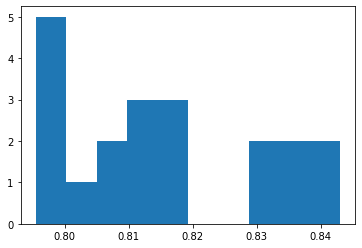

In [23]:
pylab.hist(resultados)

In [24]:
np.mean(resultados)

0.815701113518416

In [26]:
teste['familia'] = teste['SibSp'] + teste['Parch']
teste['Sexo_bin'] = teste['Sex'].map(transf_sex)


teste['Embarked_S'] = (teste['Embarked'] == 'S').astype(int)
teste['Embarked_C'] = (teste['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

teste['Cabine_nula'] = teste['Cabin'].isnull().astype(int)

teste['Nome_contem_Miss'] = teste['Name'].str.contains("Miss").astype(int)
teste['Nome_contem_Mrs'] = teste['Name'].str.contains("Mrs").astype(int)

teste['Nome_contem_Master'] = teste['Name'].str.contains("Master").astype(int)
teste['Nome_contem_Col'] = teste['Name'].str.contains("Col").astype(int)
teste['Nome_contem_Major'] = teste['Name'].str.contains("Major").astype(int)
teste['Nome_contem_Mr'] = teste['Name'].str.contains("Mr").astype(int)

In [27]:
modelo = LogisticRegression()
modelo.fit(X, y)

p = modelo.predict(teste[variaveis].fillna(-1))

C:\Users\lazza\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
sub = pd.Series(p, index=teste['PassengerId'], name='Survived')
sub.shape

(418,)

In [29]:
sub.to_csv("modelofinal.csv", header=True)